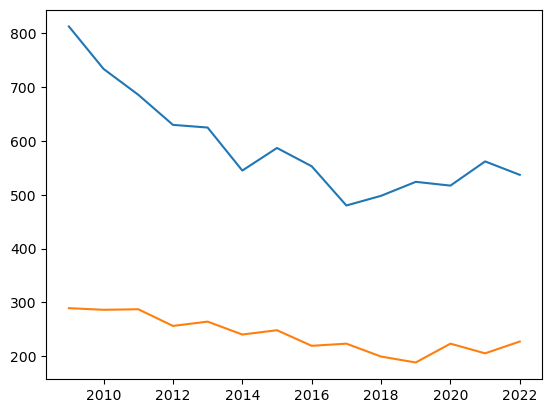

In [14]:
import json
import matplotlib.pyplot as plt

with open("deaths-by-age.json") as file:
    file_content = file.read()

document = json.loads(file_content)
data = document['data']

def from_entry(entry):
    key = entry['key']
    values = entry['values']
    age = int(key[0])
    year = int(key[1])
    sex = int(key[2])
    deaths = int(values[0])
    return (year, age, sex), deaths

deaths = {}
males = []
females = []

for e in data:
    key, value = from_entry(e)
    deaths[key] = value

for y in range(2009, 2023):
    males_per_year = 0
    females_per_year = 0
    for a in range(15, 50):
        males_per_year += deaths[(y, a, 1)]
        females_per_year += deaths[(y, a, 2)]
    males += [males_per_year]
    females += [females_per_year]

plt.plot(range(2009, 2023), males)
plt.plot(range(2009, 2023), females)
